In [20]:
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 15})



## efficient

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def file_reader(fname):
    f = open(fname)
    last_token_sim = json.load(f)
    # last_token_sim = np.array(data)
    # print(last_token_sim.shape)
    f.close()
    return last_token_sim

model_name = "meta-llama/Llama-2-70b-hf"
# model_name = "mistralai/Mistral-7B-v0.1"
# model_name = "Qwen/Qwen-72B"

out_dir = "data/"
num_layers = 80
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
step_list = np.arange(1,65)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_min = []

fname = out_dir+ f"c4_{model_name.split('/')[-1]}_steps.json"
# fname = out_dir+ f"mmlu_{model_name.split('/')[-1]}_steps.json"

similarity =  file_reader(fname)
print(len(similarity["1"]))

# plt.figure(figsize=(5,4))
plt.figure(figsize=(6,3))
for idx, step in enumerate(step_list):
# for idx, step in enumerate([1]):
    x = np.arange(num_layers-step+1)
    y =  np.arccos(np.array(similarity[f"{step}"])).mean(axis=0)/np.pi
    idx_min = np.argmin(y)
    x_min.append(x[idx_min])
    y_min.append(y[idx_min])
    # id0 = int(len(y)/2)
    # id0 = 9
    # idx_min = np.argmin(y[id0:])
    # x_min.append(x[id0+idx_min])
    # y_min.append(y[id0+idx_min])

    if step == num_layers//2:
        plt.plot(x, y,"r.-", markersize=3,linewidth=1.5,label=f"{step}")
    else:
        plt.plot(x, y,".-", markersize=3,linewidth=1.5,color=colors[idx],label=f"{step}")
    # plt.plot(x, y,".-", markersize=3,linewidth=1.5,label=f"{step}")

plt.plot(x_min,y_min,"kx-",markersize=4,alpha=0.5)
plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Angular Distance")
plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
# plt.savefig("figures/"+f"c4_{model_name.split('/')[-1]}.pdf")
plt.show()

KeyboardInterrupt: 

8700


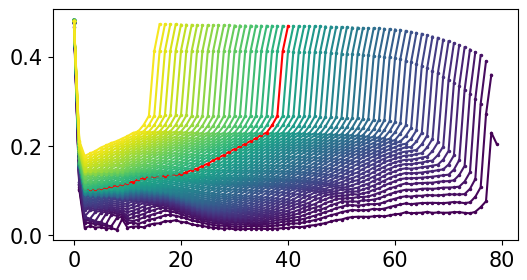

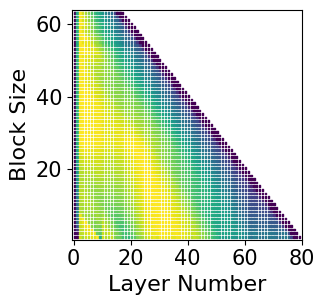

In [27]:
# import matplotlib.pyplot as plt
# import numpy as np

def file_reader(fname):
    f = open(fname)
    last_token_sim = json.load(f)
    # last_token_sim = np.array(data)
    # print(last_token_sim.shape)
    f.close()
    return last_token_sim

# model_name = "meta-llama/Llama-2-70b-hf"
# model_name = "mistralai/Mistral-7B-v0.1"
model_name = "Qwen/Qwen-72B"

out_dir = "data/"
num_layers = 80
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
step_list = np.arange(1,65)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_min = []

fname = out_dir+ f"c4_{model_name.split('/')[-1]}_steps.json"
# fname = out_dir+ f"mmlu_{model_name.split('/')[-1]}_steps.json"

similarity =  file_reader(fname)
print(len(similarity["1"]))

# plt.figure(figsize=(5,4))
# plt.figure()
for idx, step in enumerate(step_list):
# for idx, step in enumerate([1]):
    x = np.arange(num_layers-step+1)
    y =  np.arccos(np.array(similarity[f"{step}"])).mean(axis=0)/np.pi
    y_min = y.min()
    y_max = y[2:-2].max()
    # y /= y_min
    y_rescaled = (y- y_min)/(y_max-y_min)
    # y_max = 1.4
    # y_min = 1.0
    # y_max = y[1:-2].max()#/2 if y.max()/2 > y_min else y.max()
    # y_plot = np.linspace(y_min,y_max,len(y))
    y_color = np.linspace(0,1,len(y))
    colors_bar = plt.cm.viridis_r(y_color)
    plt.figure(1,figsize=(3.5,3.3))
    width = num_layers/(num_layers-step+1)
    for i_y, y_val in enumerate(y_rescaled):
        color = np.zeros(4)
        for i in range(4):
            # color[i]=np.interp(y_val, y_plot, colors_bar[:,i])
            color[i]=np.interp(y_val, y_color, colors_bar[:,i])
        box_dim = 0.45
        plt.fill_between(np.array([i_y,i_y+box_dim]),[step,step],[step+box_dim,step+box_dim], color = color)
    # plt.text(num_layers+1, step+0.4, f"{step}")
    plt.figure(2,figsize=(6,3))
    if step == num_layers//2:
        plt.plot(x, y,"r.-", markersize=3,linewidth=1.5,label=f"{step}")
    else:
        plt.plot(x, y,".-", markersize=3,linewidth=1.5,color=colors[idx],label=f"{step}")

plt.figure(1)
plt.xlabel("Layer Number",fontsize=16)# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Block Size",fontsize=16)
# plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
plt.ylim([0.4,step_list.max()])
plt.xlim([-0.6,num_layers])
plt.xticks(np.arange(0,81,20))
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
fig_dir = "figures/"
plt.savefig(fig_dir+f"ang_dist_color_{model_name.split('/')[-1]}.pdf")
plt.show()

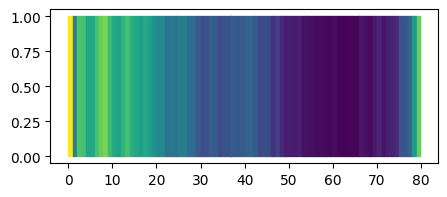

In [ ]:
y.min()

0.03872454736471855